## Extract lathe_laur data as csv files (one per sample)

In [2]:
import json
import pandas as pd
import re
import os
import codecs
import csv

In [3]:
# Get a list of all files
path = 'datasets/lathe_laur/'
list_files = [path+i for i in os.listdir(path)]
list_files.sort()
list_files


['datasets/lathe_laur/type_a.json',
 'datasets/lathe_laur/type_b.json',
 'datasets/lathe_laur/type_c.json',
 'datasets/lathe_laur/type_d.json',
 'datasets/lathe_laur/type_e.json',
 'datasets/lathe_laur/type_f.json',
 'datasets/lathe_laur/type_g.json',
 'datasets/lathe_laur/type_h.json',
 'datasets/lathe_laur/type_i.json',
 'datasets/lathe_laur/type_j.json']

In [4]:
data_list = []

for file_name in list_files:
    # Extract them in a list
    type_n_data = []

    with open(file_name) as file:
        for line in file:
            json_obj = json.loads(line)
            type_n_data.append(json_obj)
    

    # Make a df of each sample
    type_df_list = []
    for i, item in enumerate(type_n_data):
        values = item['payload']['values']
        df = pd.DataFrame(values)
        type_df_list.append(df)
    
    data_list.append(type_df_list)

#### df architecture

 0 - xAxis;
 1 - yAxis;
 2 - zAzis;

In [5]:
# Type 1 - Analysis
type_1 = data_list[0]

# List of means
type_1_means = []
for i in range(10):
    type_1_means.append(type_1[i].mean())
pd.DataFrame(type_1_means).var()

0    0.000084
1    0.000044
2    0.000021
dtype: float64

In [6]:
var_list = []
for i in data_list:
    list_means = []
    for j in range(5):
        list_means.append(i[j].mean())
    var_list.append(pd.DataFrame(list_means).var())

<AxesSubplot:>

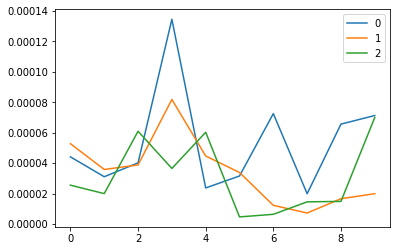

In [7]:
pd.DataFrame(var_list).plot()

<AxesSubplot:>

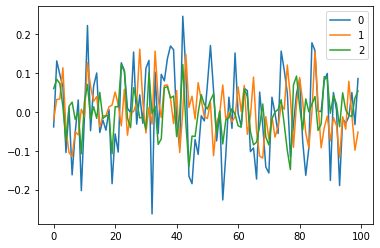

In [11]:
# Plot a sample without the mean 
tf = data_list[2][2] - data_list[2][2].mean()
tf.plot()

In [14]:
# Get a list with the mean removed
var_list = []
for i in data_list:
    list_means_remov = []
    # take 20 samples
    for j in range(5):
        list_means_remov.append(i[j].mean())
    var_list.append(pd.DataFrame(list_means_remov).var())

### Place each sample in a separate csv file
And on different folders

In [15]:
import csv

folder_name = ['type_a', 'type_b', 'type_c', 'type_d', 'type_e', 'type_f', 'type_g', 'type_h', 'type_i', 'type_j']

for i in range(10):
    index = 0
    # Place each sample in a csv file
    for sample in data_list[i]:
        # Save as csv file
        sample.to_csv(path_or_buf='datasets/lathe_laur_csv/' + folder_name[i]+ '/' +str(index)+".csv", header=False, index=False)
        # Increment index
        index+=1